# Finding the Best Markets to Advertise In
we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

## Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd

survey=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

print(survey.shape)

print(survey.head(5))

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN    

From all the above columns we need to sort out relevant columns for the purpose of our analysis.

As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

Where are these new coders located.
What are the locations with the greatest number of new coders.
How much money new coders are willing to spend on learning.
Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

For this we can explore the JobRoleInterest column that describes for every participant the role(s) they'd be interested in working in. So if a participant is interested in a certain job role it means that they will also need and would want to get expertise in the same. So lets explore this column first.

In [2]:
survey['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

The output of above code shows there are job roles that are repeated many times in different ways.

Let us get a more precise picture of this column.

In [3]:
series_jobrole = survey['JobRoleInterest'].dropna()
series_jobrole = series_jobrole.str.split(',')
print(series_jobrole)

series_numberofjobroles = series_jobrole.apply(lambda x: len(x))
round(series_numberofjobroles.value_counts(normalize = True).sort_index() * 100, 2)

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

1     31.65
2     10.88
3     15.89
4     15.22
5     12.04
6      6.72
7      3.86
8      1.76
9      0.99
10     0.47
11     0.19
12     0.30
13     0.03
Name: JobRoleInterest, dtype: float64

As we can see from our code output that 31.65 percentage are interested in one job role. While others are interested in 2 to 13 different job roles at a go which amounts to 68.35 percentage.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

In [4]:
series_subject = survey['JobRoleInterest'].dropna()
subject_interests = series_subject.str.contains('Web Developer|Mobile Developer')
freq_subjectinterest = round(subject_interests.value_counts(normalize = True) * 100, 2)
print(freq_subjectinterest)

True     86.24
False    13.76
Name: JobRoleInterest, dtype: float64


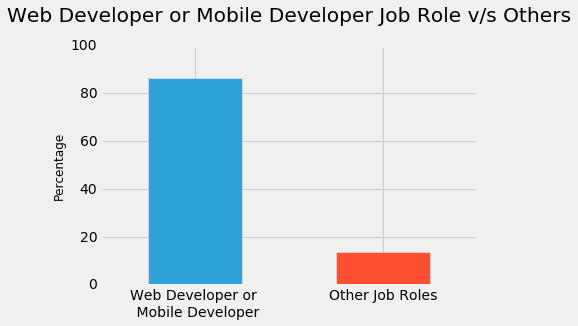

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

freq_subjectinterest.plot.bar()
plt.title('Web Developer or Mobile Developer Job Role v/s Others',
          y = 1.08) 
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web Developer or \n Mobile Developer', 'Other Job Roles'],
           rotation = 0)
plt.ylim([0,100])
plt.show()

As seen in above output we have 86.24 percentage demand in Web Developer or Mobile Developer job role. And since as mentioned earlier most of our courses are on Web Development and Mobile Development we can indeed strongly consider this sample representative for our population of interest

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it further. We can start with finding out

* where these new coders are located?
* how many coderes there are for each location?

In [6]:
clean = survey[survey['JobRoleInterest'].notnull()].copy()
absolutefrq = clean['CountryLive'].value_counts()
relativefrq = round(clean['CountryLive'].value_counts(normalize = True) * 100, 2)
countries = pd.DataFrame(data = {'Absolute frequency': absolutefrq, 
                     'Percentage': relativefrq}
            )
countries

,Absolute frequency,Percentage
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49
Ukraine,89,1.30


Our output shows USA is the best country where we can advertise as it has more potential prospects who are interested in such job role, thus more likely they are searching for some courses to enhance, polish and upgrad their skills to avail the job. Second in line is India followed by United Kingdom and Canada.

So based on the results, the two countries we would choose as potential market for advertisement are:

- United States of America
- India

We need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.



In [7]:
clean['MonthsProgramming'].replace(0 , 1, inplace = True)

print ('Null in Money for Learning', clean['MoneyForLearning'].isnull().sum())

print ('Null in Months Programming', clean['MonthsProgramming'].isnull().sum())

Null in Money for Learning 516
Null in Months Programming 359


Selecting only records where the participants have given answers for both MoneyForLearning column and MonthsProgramming column to get more precise output we are also selecting only records where CountryLive column is being answered.
And we'll create a new column to identify the money per month available creating a table grouped by country.  

In [8]:
clean_2 = clean[clean['MoneyForLearning'].notnull() & clean['MonthsProgramming'].notnull() & clean['CountryLive'].notnull()].copy()
clean_2.shape
clean_2['CountryLive'].value_counts().head()
clean_2['money_per_month'] = clean_2['MoneyForLearning'] / clean_2['MonthsProgramming']

In [9]:
countries_mean = clean_2.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

In [10]:
feespercountry = clean_2[clean_2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
feespercountry.groupby('CountryLive')['money_per_month'].value_counts()

CountryLive               money_per_month
Canada                    0.000000           126
                          25.000000            6
                          20.000000            5
                          33.333333            5
                          50.000000            5
                          8.333333             4
                          4.166667             3
                          5.000000             3
                          12.500000            3
                          13.888889            3
                          16.666667            3
                          83.333333            3
                          2.500000             2
                          3.333333             2
                          3.750000             2
                          4.000000             2
                          30.000000            2
                          41.666667            2
                          62.500000            2
                          1

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



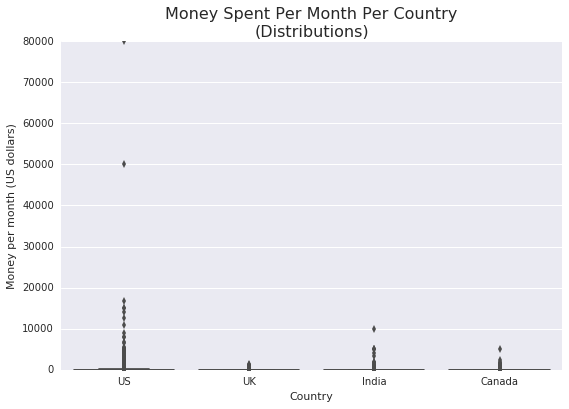

In [11]:
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = feespercountry)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We remove outliers. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



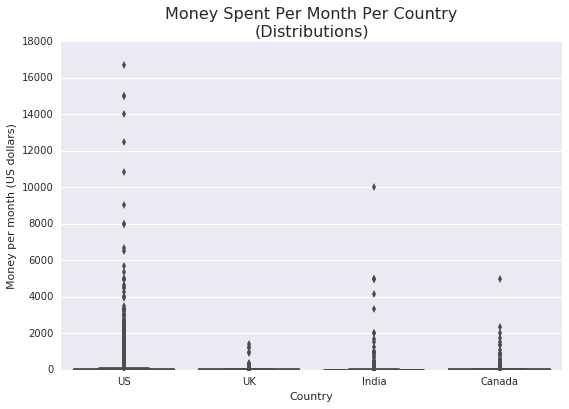

In [12]:
clean_2 = clean_2[clean_2['money_per_month'] < 20000]

feespercountry = clean_2[clean_2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
feespercountry.groupby('CountryLive')['money_per_month'].value_counts()

import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = feespercountry)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

There are still outliers in US and India

In [13]:
india_outliers = feespercountry[
    (feespercountry['CountryLive'] == 'India') & 
    (feespercountry['money_per_month'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [14]:
clean_2 = clean_2.drop(india_outliers.index)

In [15]:
us_outliers = feespercountry[
    (feespercountry['CountryLive'] == 'United States of America') & 
    (feespercountry['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


In [16]:
bootcamp_noinfo = clean_2[
    (clean_2['CountryLive'] == 'United States of America') & 
    (clean_2['money_per_month'] >= 6000) &
    (clean_2['AttendedBootcamp'] == 0)
]

clean_2 = clean_2.drop(bootcamp_noinfo.index)

In [17]:
less_than_3_months = clean_2[
    (clean_2['CountryLive'] == 'United States of America') & 
    (clean_2['money_per_month'] >= 6000) &
    (clean_2['MonthsProgramming'] <= 3)
]

clean_2= clean_2.drop(less_than_3_months.index)

In [18]:
canada_outliers = clean_2[
    (clean_2['CountryLive'] == 'Canada') & 
    (clean_2['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [19]:
clean_2= clean_2.drop(canada_outliers.index)

In [20]:
countries_mean = clean_2.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



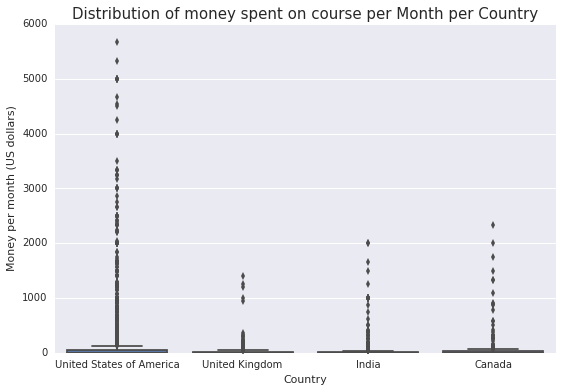

In [21]:
feespercountry = clean_2[clean_2['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
feespercountry.groupby('CountryLive')['money_per_month'].value_counts()


import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = feespercountry)
plt.title('Distribution of money spent on course per Month per Country',
         fontsize = 15)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

We need to choose one more market though.
* We sell subscriptions at a price of $59 per month.
* Need to consider the number of potential customers in each country

In [22]:
feespercountry['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.
At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.